In [2]:
%reload_ext autoreload
%autoreload 2

In [3]:

from IPython.display import display, Markdown

import sys
sys.path.append('.')

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D


from util import (
  draw_graphs as _draw_graphs,
  plot_distance_heatmap,
  plot_max_match_results
)
from pipeline import make_pipeline

from mcopt import ot, MorseGraph

In [4]:
pipeline = make_pipeline()

red_sea = pipeline.dataset('red_sea')

display(Markdown(red_sea.display_description()))


# Red Sea


TODO
 


In [5]:
graphs = pipeline.graph('red_sea').build().frames
nets = pipeline.mm_network('red_sea').build().frames
attributes = pipeline.attributes('red_sea').build()

> [graph:red_sea] config unchanged, loading


> [mmnetwork:red_sea] config unchanged, loading


> [attributes:red_sea] config unchanged, loading


In [6]:
src_net = nets[1]
dest_net = nets[4]
src = graphs[1]
dest = graphs[4]

In [7]:
max_match_pfgw = pipeline.max_match('red_sea_max_match_pfgw').build()


> [max_match:red_sea_max_match_pfgw] config unchanged, loading


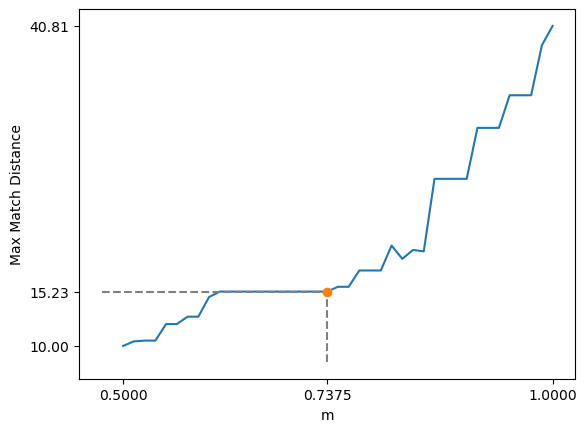

In [8]:
m = 0.7375

fig, ax = plt.subplots()
  
x = max_match_pfgw.ms
y = max_match_pfgw.results[:, 4]

ax.plot(x, y)

ymin, _ = ax.get_ybound()
xmin, _ = ax.get_xbound()

i = np.abs(x - m).argmin()

ax.add_line(Line2D([x[i], x[i]], [ymin, y[i]], color='grey', linestyle='--'))
ax.add_line(Line2D([xmin, x[i]], [y[i], y[i]], color='grey', linestyle='--'))
ax.plot(x[i], y[i], marker='o')

ax.set_xlabel('m', fontsize=10)
ax.set_ylabel('Max Match Distance', fontsize=10)

ax.set_xticks([x.min(), x[i], x.max()])
ax.set_yticks([y.min(), y[i], y.max()])

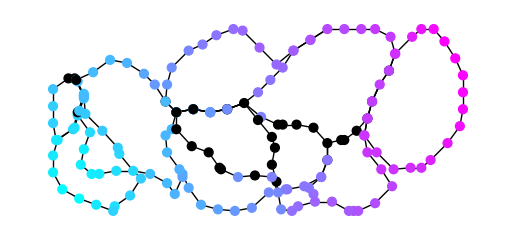

In [9]:

coupling, _ = ot.pfGW(
  src_net, 
  dest_net, 
  m = m,
  M = attributes.attrs[attributes.index_map[1], attributes.index_map[4]],
)

src_node_color = src.node_color_by_position()

fig, ax = plt.subplots()

dest.draw(
  ax = ax,
  cmap = 'cool',
  node_color = dest.node_color_by_coupling(src_node_color, coupling),
)

fig.savefig('figures/red_sea_pfgw_individual.0004.png', dpi=300)

In [10]:
max_match_pw = pipeline.max_match('red_sea_max_match_pw').build()

max_match_pw.results.shape

> [max_match:red_sea_max_match_pw] config unchanged, loading


(41, 9)

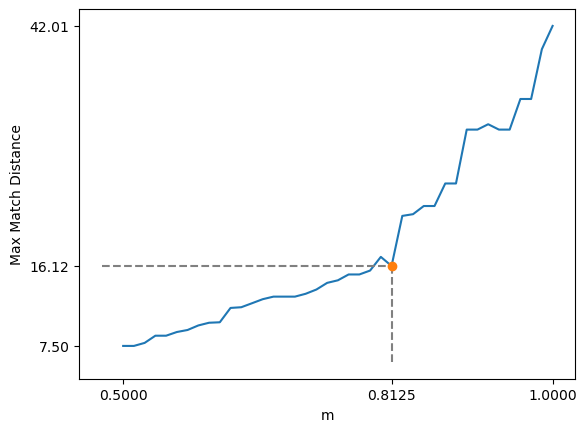

In [11]:
m = 0.8125

fig, ax = plt.subplots()
  
x = max_match_pw.ms
y = max_match_pw.results[:, 4]

ax.plot(x, y)

ymin, _ = ax.get_ybound()
xmin, _ = ax.get_xbound()

i = np.abs(x - m).argmin()

ax.add_line(Line2D([x[i], x[i]], [ymin, y[i]], color='grey', linestyle='--'))
ax.add_line(Line2D([xmin, x[i]], [y[i], y[i]], color='grey', linestyle='--'))
ax.plot(x[i], y[i], marker='o')

ax.set_xlabel('m', fontsize=10)
ax.set_ylabel('Max Match Distance', fontsize=10)

ax.set_xticks([x.min(), x[i], x.max()])
ax.set_yticks([y.min(), y[i], y.max()])

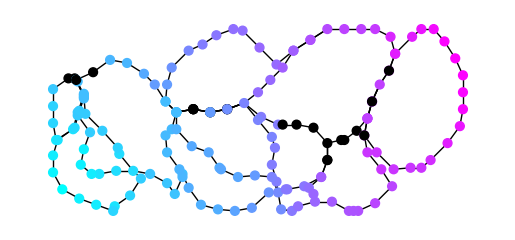

In [12]:
coupling, _ = ot.pWasserstein(
  src_net, 
  dest_net, 
  m = m,
  M = attributes.attrs[attributes.index_map[1], attributes.index_map[4]],
)
src_node_color = src.node_color_by_position()

fig, ax = plt.subplots()

dest.draw(
  ax = ax,
  cmap = 'cool',
  node_color = dest.node_color_by_coupling(src_node_color, coupling),
)

fig.savefig('figures/red_sea_pw_individual.0004.png', dpi=300)

In [14]:
m_start = 0.75
m_end = 1
num_ms = 30
  
ms = [m_start + i * (m_end - m_start) / num_ms for i in range(num_ms)] + [m_end]

src_net = nets[1]
dest_net = nets[4]

distances = np.zeros(shape = len(ms))

for i, m in enumerate(ms):
  if np.isclose(m, 1):
    _, d = ot.GW(src_net, dest_net)
  else:
    _, d = ot.pGW(
      src_net, 
      dest_net, 
      m = m,
    )
  
  print(f'm = {m}, d = {d}')
  distances[i] = d

m = 0.75, d = 0.03572956645736603
m = 0.7583333333333333, d = 0.03695849297493428
m = 0.7666666666666667, d = 0.038232838994649854
m = 0.775, d = 0.03946249862579704
m = 0.7833333333333333, d = 0.040880292137916156
m = 0.7916666666666666, d = 0.04233055480041829
m = 0.8, d = 0.04370917288084588
m = 0.8083333333333333, d = 0.045099243536689496
m = 0.8166666666666667, d = 0.046537077596670105
m = 0.825, d = 0.04985945274093867
m = 0.8333333333333334, d = 0.05104625252483997
m = 0.8416666666666667, d = 0.052389195406343535
m = 0.85, d = 0.05225144957433083
m = 0.8583333333333334, d = 0.05372534012064508
m = 0.8666666666666667, d = 0.05519501439731183
m = 0.875, d = 0.05790068130564169
m = 0.8833333333333333, d = 0.05915559070433152
m = 0.8916666666666666, d = 0.06044049270899749
m = 0.9, d = 0.06184034478667456
m = 0.9083333333333333, d = 0.06323008010182811
m = 0.9166666666666666, d = 0.0647338051207861
m = 0.925, d = 0.066333288511451
m = 0.9333333333333333, d = 0.06768651272152455
m = 

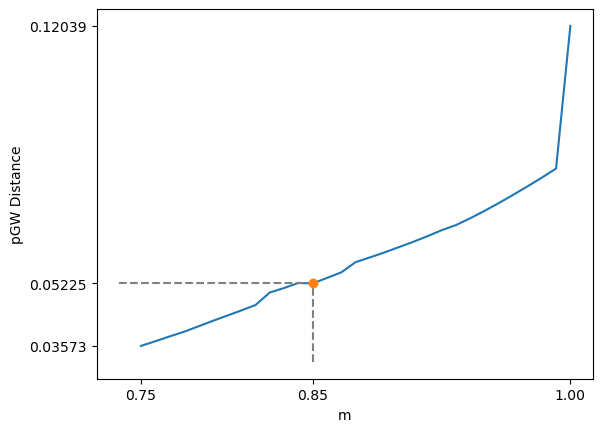

In [19]:
m = 0.85

fig, ax = plt.subplots()
  
x = np.asarray(ms)
y = distances

ax.plot(x, y)

ymin, _ = ax.get_ybound()
xmin, _ = ax.get_xbound()

i = np.abs(x - m).argmin()

ax.add_line(Line2D([x[i], x[i]], [ymin, y[i]], color='grey', linestyle='--'))
ax.add_line(Line2D([xmin, x[i]], [y[i], y[i]], color='grey', linestyle='--'))
ax.plot(x[i], y[i], marker='o')

ax.set_xlabel('m', fontsize=10)
ax.set_ylabel('pGW Distance', fontsize=10)

ax.set_xticks([x.min(), x[i], x.max()])
ax.set_yticks([y.min(), y[i], y.max()])

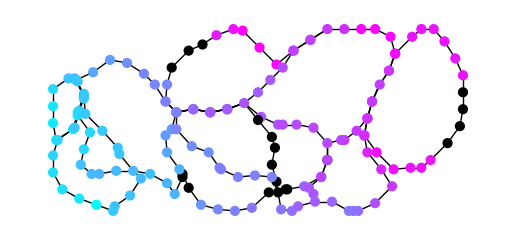

In [21]:
src_net = nets[1]
dest_net = nets[4]

coupling, _ = ot.pGW(
  src_net, 
  dest_net, 
  m = m,
)

src = graphs[1]
dest = graphs[4]

src_node_color = src.node_color_by_position()

fig, ax = plt.subplots()

dest.draw(
  ax = ax,
  cmap = 'cool',
  node_color = dest.node_color_by_coupling(src_node_color, coupling),
)

fig.savefig('figures/red_sea_pgw_individual.0004.png', dpi=300)